### Neurona

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Neurona:

    def __init__(self, N):
        self.b = 1
        self.w = np.zeros([N, 1])
        for a in range(N):
            self.w[a, 0] = np.random.randn()*0.1

    def sigmoide(self, X):
        t = self.b + self.w[0, 0] * X[0, 0] + self.w[1, 0] * X[0, 1]
        return round(1 / ( 1 + np.exp( -t ) ))

    def __str__(self):
        return f"b = {self.b}\nw=\n{self.w}"

# X = np.zeros([1, 2])
# X[0, 1] = 1

# #NOR
# n1 = Neurona(2)
# n1.b = 10
# n1.w[0, 0] = -20
# n1.w[1, 0] = -20

# #AND
# n2 = Neurona(2)
# n2.b = -30
# n2.w[0, 0] = 60
# n2.w[1, 0] = 60

# #OR
# n3 = Neurona(2)
# n3.b = -10
# n3.w[0, 0] = 20
# n3.w[1, 0] = 20

# print(f"NOR = {n1.sigmoide(X)}")
# print(f"AND = {n2.sigmoide(X)}")
# print(f"OR = {n3.sigmoide(X)}")

### Capa

In [51]:
class Capa:
    # Entradas y neuronas
    def __init__(self, N, M):
        self.neuronas = []
        for i in range(0, M):
            self.neuronas.append(Neurona(N))

    def forwardPropagation(self, x):
        salida = np.zeros([1, len(self.neuronas)])
        for a in range(len(self.neuronas)):
            s = float(self.neuronas[a].sigmoide(x))
            salida[0, a] = s 
        return salida

    def __str__(self):
        salida = [str(txt) for txt in self.neuronas]
        return "\n".join(salida)

capa1 = Capa(2, 2)
capa2 = Capa(2, 1)

###NOR
n1 = capa1.neuronas[0]
n1.b = 10
n1.w[0, 0] = -20
n1.w[1, 0] = -20

#AND
n2 = capa1.neuronas[1]
n2.b = -30
n2.w[0, 0] = 20
n2.w[1, 0] = 20

#OR
n3 = capa2.neuronas[0]
n3.b = -10
n3.w[0, 0] = 20
n3.w[1, 0] = 20

X = np.zeros([1,2])
X[0, 0] = 0
X[0, 1] = 1

# print(f"X={X}")
# print(f"NOR = {n1.sigmoide(X)}")
# print(f"AND = {n2.sigmoide(X)}")
# print(f"OR = {n3.sigmoide(X)}")
# C1 = capa1.forwardPropagation(X)
# print(f"Capa1 = {C1}")
# print(f"Capa2 = {capa2.forwardPropagation(C1)}")



### RedNeuronal

In [52]:
class RedNeuronal:

    def __init__(self, lista):
        entradas = lista[0]
        self.capas = []
        entradas = None
        for capa in lista[1:]:
            if (not entradas):
                entradas = capa
            self.capas.append(Capa(entradas, capa))
            entradas = capa

    def cargarNOR(self):
        n1 = self.capas[0].neuronas[0]
        n1.b = 10
        n1.w[0, 0] = -20
        n1.w[1, 0] = -20

    def cargarAND(self):
        n2 = self.capas[0].neuronas[1]
        n2.b = -30
        n2.w[0, 0] = 20
        n2.w[1, 0] = 20

    def cargarOR(self):
        n3 = self.capas[1].neuronas[0]
        n3.b = -10
        n3.w[0, 0] = 20
        n3.w[1, 0] = 20

    def resolverNOR(self, X):
        return self.capas[0].neuronas[0].sigmoide(X)

    def resolverAND(self, X):
        return self.capas[0].neuronas[1].sigmoide(X)

    def resolverOR(self, X):
        return self.capas[1].neuronas[0].sigmoide(X)

    def forwardPropagation(self, X):
        for index, capa in enumerate(self.capas):
            X = capa.forwardPropagation(X)
        return X

RedNeuronal = RedNeuronal([2, 2, 1])
RedNeuronal.cargarNOR()
RedNeuronal.cargarAND()
RedNeuronal.cargarOR()

# X = np.zeros([1,2])
# X[0, 0] = 1
# X[0, 1] = 0.6
# print(f"X = {X}")
# print(RedNeuronal.forwardPropagation(X))


### Tabla de verdad de XNOR

In [53]:
import math
from tabulate import tabulate

X1 = [0, 0, 1 , 1]
X2 = [0, 1, 0 , 1]

res = []

for index, value in enumerate(X1):
    X = np.zeros([1,2])
    X[0, 0] = value
    X[0, 1] = X2[index]
    res.append([
        X[0, 0],
        X[0, 1],
        RedNeuronal.resolverAND(X), 
        RedNeuronal.resolverOR(X), 
        RedNeuronal.resolverNOR(X),
        RedNeuronal.forwardPropagation(X)[0][0]
    ])

print(tabulate(res, headers=["X1", "X2", "AND", "OR", "NOR", "XNOR"]))

  X1    X2    AND    OR    NOR    XNOR
----  ----  -----  ----  -----  ------
   0     0      0     0      1       1
   0     1      0     1      0       0
   1     0      0     1      0       0
   1     1      1     1      0       1


### Ejercicio 1

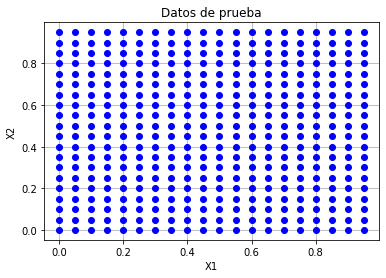

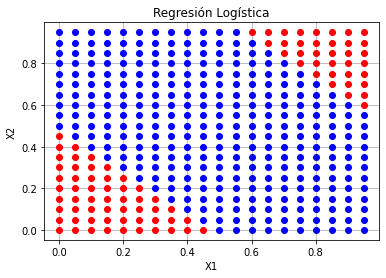

In [54]:
datos = pd.read_csv("./data/datosPrueba.csv")
datos = datos.to_numpy()
m,n = datos.shape
X = datos[:,0:n-1]
Y = datos[:,n-1:n]

plt.plot(X[:,0],X[:,1],"bo")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Datos de prueba")
plt.show()

X0 = []
X1 = []

for index, XA in enumerate(X):
    XT = np.zeros([1,2])
    XT[0, 0] = XA[0]
    XT[0, 1] = XA[1]
    if (RedNeuronal.forwardPropagation(XT) < 0.5):
        X0.append(index)
    else:
        X1.append(index)

plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Regresión Logística")
plt.show()
